---

# Aerodynamics (mid-term exam, Spring 2018) - Karman-Trefftz airfoil

---

This exam will last 2 hours and 30 minutes and is divided in three parts:

- In the first part, you will use the Karman-Trefftz transform to map a cylinder to a cambered airfoil with a non-zero tail angle at the trailing edge. This is similar to what we have done in the second homework with the Joukowski transform. **(70 points / 100.)**

- In the second part, you will read data from a file and apply the principle of superposition to plot the streamlines and the pressure coefficient. **(30 points.)**

- The last part is a small quiz (about the theory of lift) to glean extra points. **(12 points.)**


**Some recommendations**:

During this exam, you will have to write functions in Python.
Remember, docstrings are cool, they document your functions and help users to understand them.
You can re-use the functions you have implemented in the previous classes or in your homework.

In the first part, we already provide plotting functions to help you, so you do not have to spend too much time on tweaking the figures.
Read the docstring of the functions to understand how to use them.
(Of course, you are free to use your own code for plotting if you prefer.)

In the second part, you will create some figures with Matplotlib.
Pay attention to the quality of your figures: add a title or a caption, some axis labels, a legend (when necessary).

For the quiz in the third part, you can directly modify the markdown cell and fill it with you answers.

**Enjoy!**

In [29]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

---

## First part - Karman-Trefftz conformal mapping *(70 pts)*

---

### Step 1 - Conformal mapping *(5 pts)*

The Karman-Trefftz transformation maps a cylinder (defined in the $z$-plane) to an airfoil ($\xi$-plane) that possesses a non-zero tail angle at the trailing edge.

$$\xi = n \frac{\left(1 + \frac{b^2}{z}\right)^n + \left(1 - \frac{b^2}{z}\right)^n}{\left(1 + \frac{b^2}{z}\right)^n - \left(1 - \frac{b^2}{z}\right)^n}$$

where $n = 2 - \frac{\beta}{\pi}$, with $\beta$ the tail angle (in radians) at the trailing edge and $b$ a parameter to control the thickness of the airfoil.

Note that when we choose a zero tail-angle ($\beta = 0$), the Karman-Trefftz transform reduces to the Joukowski transform.

First, we need to create the conformal mapping between the $z$-plane of the cylinder and the $\xi$-plane of the airfoil.

**List of tasks:**

1- Write a function for the conformal mapping that takes the complex coordinates in the $z$-plane as an argument and returns the the comlpex coordinates in the $\xi$-plane.

To check your function, here is what we obtained:
the point $1.2 + 2.3j$ maps into the point $1.62214306992 + 2.56964536463j$ when using $b = 0.9$ and $\beta = 3.4^\circ$.

In [30]:
xc= -0.1
yc= 0.2
b= 1.0
beta= 4*numpy.pi/180
N=101
theta  = numpy.linspace(0,2*numpy.pi,N)
n=2-(beta/math.pi)
R= numpy.sqrt((b-xc)**2+(yc**2))
z = R*numpy.cos(theta) + ((R*numpy.sin(theta)+yc)*1j) +xc
l = (1+((b**2)/z))**n+(((1-(b**2/z)))**n)
k = (1+((b**2)/z))**n-(((1-(b**2/z)))**n)
e = n*(l/k)  
R

1.1180339887498949

---

### Step 2 - From a cylinder  to an airfoil *(10 pts)*

Let's use our new function to map a cylinder into a Karman-Trefftz airfoil.

**List of tasks:**

1- Create a cylinder centered at $\left(x_c, y_c\right)$ with radius $R = \sqrt{\left(b - x_c\right)^2 + y_c^2}$ with $N$ points on its surface where the first and last points coincide.

Use the following parameters:
* $x_c = -0.1$, $y_c = 0.2$
* $b = 1.0$
* $\beta = 4^\circ$
* $N = 101$

2- Apply the Karman-Trefftz transformation using the function you previously defined to get the complex coordinates of the cambered airfoil.

3- Plot the two geometries on a figure. (You can use the plotting function `plot_geometries` to save some time.)

4- Find the index **and** the coordinates of the trailing-edge point.

5- Find the coordinates of the first point (index `0`) and last point (index `N - 1`) on the airfoil. Do they coincide with the trailing-edge point?

(array([52]),)

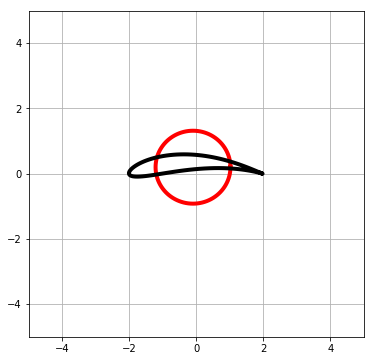

In [31]:
size = 6
pyplot.figure(figsize=(size,size))
pyplot.xlim(-5,5)
pyplot.ylim(-5,5)
pyplot.grid(True)
pyplot.plot(z.real,z.imag, color = 'red',linewidth = 4) # graph for z plane   
pyplot.plot(e.real,e.imag,color = 'black',linewidth = 4)# graph for Joukowski plane (e)

trailing=numpy.where(e==-2.0134841987998819+0.019626708531828303j)
trailing
# index is 53,1.  and coordinate is 2,0



In [32]:
e[0],e[100] # yes they coincide

((1.9405869227313388+0.015903016742596924j),
 (1.940586922731339+0.015903016742596927j))

---

### Step 3 - Mesh-grid in polar coordinates *(5 pts)*

To visualize the flow in a domain, we should probably create a mesh-grid. Let us do it in polar coordinates in the cylinder-plane ($z$-plane).

**List of tasks:**

1- Discretize the mesh-grid using $N_r = 121$ points in the radial direction ($R \leq r \leq R+5$) and $N_\theta = 101$ points on the surface of the cylinder ($0 \leq \theta \leq 2\pi$).

2- Apply the Karman-Trefftz transformation to obtain the mesh-grid in the airfoil-plane ($\xi$-plane). (Yes! You can use the function we created above.)

3- Plot the mesh-grid in both planes. (You can use the plotting function `plot_meshgrids` to save some time.)

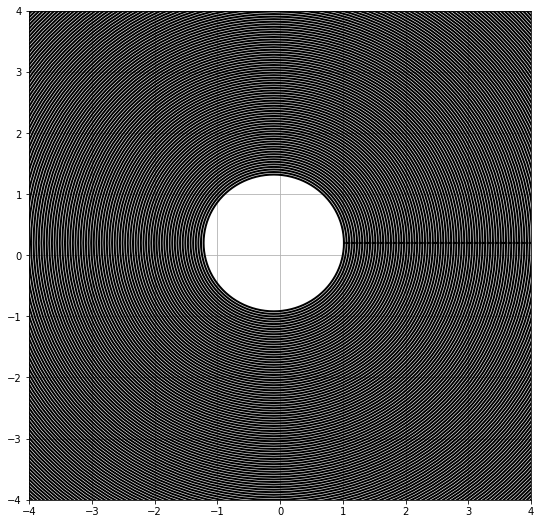

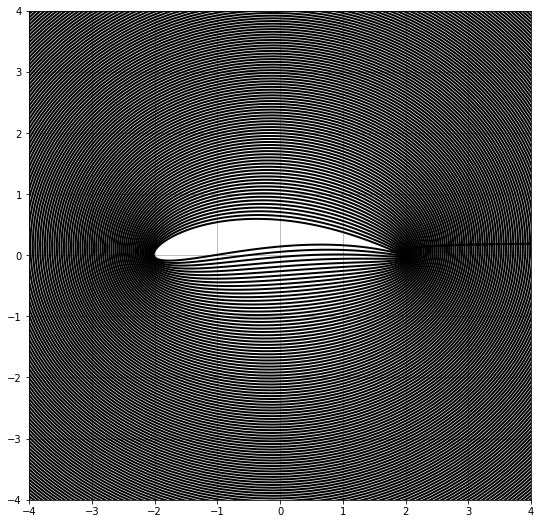

In [33]:
R_begin = 1.1180339887498949
R_end = R_begin+5
NR=121
Nthe=101
r_new=numpy.linspace(R_begin,R_end,NR)
theta1=numpy.linspace(0,numpy.pi*2,Nthe)
r1,THETA=numpy.meshgrid(r_new,theta1) #creating mesh grid of radius and theta array 

z1 = r1*numpy.cos(THETA) + ((r1*numpy.sin(THETA)+yc)*1j) +xc
l = (1+((b**2)/z1))**n+(((1-(b**2/z1)))**n)
k = (1+((b**2)/z1))**n-(((1-(b**2/z1)))**n)
e1 = n*(l/k)  

size = 9
pyplot.figure(figsize=(size,size))
pyplot.xlim(-4,4)
pyplot.ylim(-4,4)
pyplot.grid(True)
pyplot.plot(z1.real,z1.imag, color = 'black',linewidth = 2); # graph for z plane   


size = 9
pyplot.figure(figsize=(size,size))
pyplot.xlim(-4,4)
pyplot.ylim(-4,4)
pyplot.grid(True)
pyplot.plot(e1.real,e1.imag, color = 'black',linewidth = 2); # graph for e plane  

---

### Step 4 - Freestream + doublet = ? *(10 pts)*

We are now going to compute the velocity field around the cylinder in the $z$-plane.

As we now know, the potential flow around a cylinder (with no circulation) can be represented by the superposition of a doublet flow to a uniform freestream flow.

We will use a freestream with speed $U_\infty = 1$ and angle of incidence $\alpha = 0^\circ$.

**List of tasks:**

1- Compute the strength of the doublet to represent the flow around a cylinder of radius $R$ immersed in a freestream flow with speed $U_\infty$?

2(a)- Write a function that returns the velocity field, on a given 2D mesh-grid, due to a freestream.

2(b)- Write a function that returns the streamfunction, on a given 2D mesh-grid, due to a freestream.

3(a)- Write a function that returns the velocity field, on a given 2D mesh-grid, due to a point-doublet.

3(b)- Write a function that returns the streamfunction, on a given 2D mesh-grid, due to a point-doublet.

4- Using those functions, apply the principle of superposition to get the streamfunction and velocity in the cylinder-plane ($z$-plane).

5- Plot the streamlines and the velocity field in the $z$-plane. (You can use the plotting function `plot_streamlines_and_velocity` to save some time.)

In [34]:
U_inf=1.0  #free stream velocity
psi_free = U_inf*z1.imag   #free stream streamfunction
x_d,y_d=-0.1,0.2
k=2*math.pi*R**2*U_inf #kappa (strength of doublet)
print ("Strength of doublet=",k)

Strength of doublet= 7.85398163397


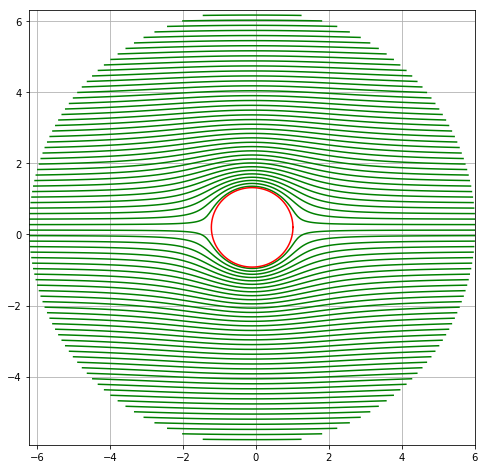

In [35]:
u = ( -k / (2 * math.pi) *((z1.real-x_d)**2 - (z1.imag-y_d)**2) /((z1.real-x_d)**2 + (z1.imag-y_d)**2)**2)
v = (- k / (2 * math.pi) * 2 * (z1.real-x_d) * (z1.imag-y_d) / ((z1.real-x_d)**2 + (z1.imag-y_d)**2)**2)
psi = - k / (2 * math.pi) * (z1.imag-y_d) / ((z1.real-x_d)**2 + (z1.imag-y_d)**2)
U=u+U_inf
PSI= psi_free + psi
z_final = R*numpy.cos(theta) + (R*numpy.sin(theta)+y_d)*1j + x_d
size=8
pyplot.figure(figsize=(size,size)) 
psi_range=numpy.linspace(numpy.min(PSI),numpy.max(PSI),80)
pyplot.contour(z1.real,z1.imag,PSI,levels = psi_range,colors = 'green',linestyles = 'solid') #plotting cylinder
pyplot.plot(z_final.real,z_final.imag,color = 'red')
pyplot.grid()

---

### Step 5 - Freestream + doublet... Is that enough? *(10 pts)*

Let's use the theory of conformal mapping to obtain the velocity field around the airfoil in the $\xi$-plane

We remember that the complex velocity in the $\xi$-plane is related to the complex velocity in the $z$-plane via the following formula:

$$W_\xi = W_z / \frac{d\xi}{dz}$$

where $W_z = u_z - i v_z$ and $W_\xi = u_\xi - iv_\xi$ are the complex velocity in the $z$-plane and the complex velocity in the $\xi$-plane, respectively.

The derivative of $\xi$ with respect to $z$ is:

$$\frac{d\xi}{dz} = \frac{4n^2b^2}{z^2 - b^4} \frac{\left(1 + \frac{b^2}{z}\right)^n \left(1 - \frac{b^2}{z}\right)^n}{\left[\left(1 + \frac{b^2}{z}\right)^n - \left(1 - \frac{b^2}{z}\right)^n\right]^2}$$

**List of tasks:**

1- Write a function that takes the complex coordinates in the $z$-plane as argument and returns the value of the derivative $\frac{d\xi}{dz}$.

To check your function, here is what we obtained:
the function on the point $1.2 + 2.3j$ returns the point $1.30174942236 + 0.0960827079789j$ when using $b = 0.9$ and $\beta = 3.4^\circ$.

2- Use the function to compute the complexe velocity in the airfoil plane ($\xi$-plane).

3- Plot the streamlines and the velocity field in the $\xi$-plane. (You can use the plotting function `plot_streamlines_and_velocity` to save some time.)

4- Does the streamlines at the trailing-edge look physical? Explain why?
(You can display a zoom at the trailing-edge to support your answer.)

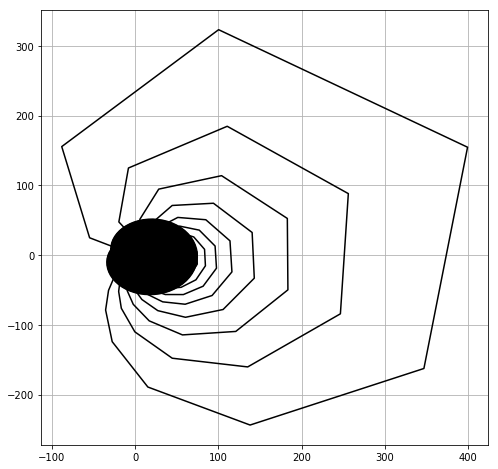

In [36]:
w_z= (U-v*1j)# complex velocity in z plane
q= ((1+((b**2)/z1))**n-(((1-(b**2/z1)))**n))
s=((1+((b**2)/z1))**n)*((1+((b**2)/z1))**n)
t=(4*n*n*b*b)/((z1**4)-(b**4))
dedez= t*(s/q**2)
w_e=w_z/dedez #complex velocity in e plane
pyplot.figure(figsize=(size,size)) 
psi_range=numpy.linspace(numpy.min(PSI),numpy.max(PSI),80)
pyplot.plot(e1.real,e1.imag,color = 'red')
pyplot.plot(w_e.real,w_e.imag,color = 'black')
pyplot.grid()


---

### Step 6 - Pressure coefficient *(10 pts)*

Let's have a look at the pressure coefficient to check what's going on.

**List of tasks:**

1- Compute and plot the pressure coefficient in both planes. (You can use the plotting function `plot_pressure_coefficient` to save some time.)

2- Find the minimum value of the pressure coefficient on the surface of the airfoil.

3- Find the index of the stagnation points?

4- The angle of incidence of the freestream is zero, so explain why the rear stagnation point is not at the trailing edge?

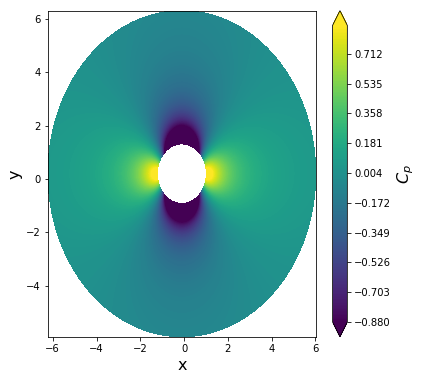

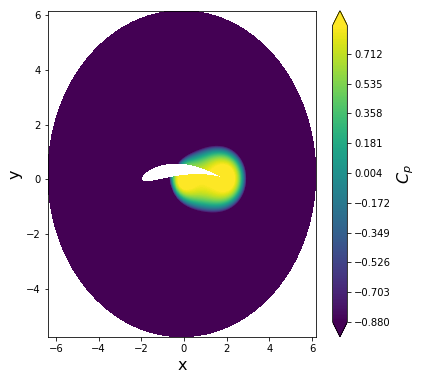

In [14]:
cpz1 = 1-(U**2+v**2)/U_inf**2 #Cp for cylinder
cpe1 = 1-((w_e.real**2+w_e.imag**2)/U_inf**2) #Cp for Aerofoil
size=6
#plot
pyplot.figure(figsize=(size,size))   #plot for cylinder
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(z1.real, z1.imag, cpz1, levels=numpy.linspace(-0.88,0.88,200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

pyplot.figure(figsize=(size,size))     #plot for airfoil
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

contf = pyplot.contourf(e1.real, e1.imag, cpe1, levels=numpy.linspace(-0.88,0.88,200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

In [15]:
cpe1.min()

-183236.63085881091

In [20]:
stag=numpy.where(cpe1==0)
stag

(array([], dtype=int64), array([], dtype=int64))

---

### Step 7 - Kutta condition! *(10 pts)*

We need to satisfy the [Kutta condition](http://en.wikipedia.org/wiki/Kutta_condition),
>"A body with a sharp trailing edge which is moving through a fluid will create about itself a circulation of sufficient strength to hold the rear stagnation point at the trailing edge."

**List of tasks:**

1- Compute the circulation (strength of the point-vortex) required to satisfy the Kutta condition (i.e. to bring the rear stagnation point at the trailing-edge).

2(a)- Write a function that returns the velocity field, on a given 2D mesh-grid, due to a point-vortex.

2(a)- Write a function that returns the stremfunction, on a given 2D mesh-grid, due to a point-vortex.

3- Apply the principle of superposition to take into account the effect of the vortex.

4- Compute and plot the streamlines and velocity field in both planes. (You can use the plotting function `plot_streamlines_and_velocity` to save some time.)

5- Compute and plot the pressure coefficient in both planes. (You can use the plotting function `plot_pressure_coefficient` to save some time.)

6- What are the index of the stagnation points? Is it what you were expecting? Explain why.

In [37]:
c_v=-k*math.sin(-2*beta)/(R*math.cos(-beta))
print (c_v)

0.980052608686


In [38]:
u_vortex = c_v / (2 * math.pi) * (z1.imag-y_d) / ((z1.real-x_d)**2 + (z1.imag-y_d)**2)
v_vortex = -c_v / (2 * math.pi) * (z1.real-x_d) / ((z1.real-x_d)**2 + (z1.imag-y_d)**2)
psi_vortex = c_v / (4 * math.pi) * (numpy.log((z1.real-x_d)**2 + (z1.imag-y_d)**2))
u_circulation = u_vortex + U
v_circulation = v_vortex + v
psi_circulation = psi_vortex + PSI

pyplot.figure(figsize=(size,size))
pyplot.contour(z1.real,z1.imag,psi_circulation,levels = numpy.linspace(numpy.min(psi_circulation),numpy.max(psi_circulation),60),colors = 'k',linestyles = 'solid')
pyplot.plot(z_final.real,z_final.imag,color = 'k')
pyplot.grid()
l=numpy.linspace(numpy.min(psi_circulation),numpy.max(psi_circulation),60)
pyplot.figure(figsize=(size,size))
pyplot.contour(e.real,e.imag,psi_circulation,levels=l,colors = 'k',linestyles='solid')
pyplot.plot(ee.real,ee.imag,color='k')
pyplot.grid()

---

### Step 8 - What about the lift and drag? *(10 pts)*

The drag is the force in the direction of the motion of the airfoil;
the lift is the force perpendicular.

**List of tasks:**

1- Assuming a density $\rho=1$ and a farfield pressure $p_\infty=0$, compute the lift in two ways:
* using the Kutta-Joukowski theorem,
* numerically integrating the pressure along the surface of the cylinder ($L = -\oint p \times \sin{\theta} dA$).

2- Compute the drag by numerically integrating the pressure along the surface of the cylinder ($D = -\oint p \times \cos{\theta} dA$). What's the value? Is it what you were expecting? Explain why?

In [ ]:
# Use this cell to provide the code.

---

## Second part - Sources and vortices *(30 pts)*

---

In the first part of the exam, we have used a conformal mapping and the complex-variable theory to model the flow around an airfoil.

Here, we provide you a set of points which represents the previously used Karman-Trefftz airfoil, as well as the source strength and the vortex strength associated with each point.

You will need to load data from a file and apply the principle of superposition to get the velocity field, on a 2D Cartesian grid, generated by those singularities.

We are going to use the same freestream conditions: speed $U_\infty = 1$ with angle of incidence $\alpha = 0^\circ$.

The file `karmantrefftz_data.txt` contains $N$ lines (where $N$ is the number of points used to discretize the airfoil) and 4 columns (x-coordinates, y-coordinates, vortex strengths, and source strengths).

You are problably wondering how we obtained those source strengths and vortex strengths.
Well, they are the solution from the source-vortex panel method that we are going to implement during the second part of the semester.

**List of tasks:**

1- Load the data from the file `karmantrefftz_data.txt` using the Numpy function [`numpy.loadtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). (You should set the keyword argument `unpack` to `True` when using the Numpy function `numpy.loadtxt()`.)

2- Create a $121 \times 121$ Cartesian grid that covers the domain $[-2.5, 2.5]\times[-1.0, 1.0]$.

3- Write a function to compute the velocity field, on a given 2D mesh-grid, due to a source-point. (You can re-use a previously implemented function.)

4- Write a function to compute the velocity field, on a 2D mesh-grid, due to a vortex-point. (You can re-use a previously implemented function.)

5- Compute the velocity field generated by the freestream, the source-points, and the vortex-points and plot the streamlines using the Matplotlib function [`pyplot.streamplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.streamplot.html).

6- Compute the field of pressure coefficient and plot its filled contour using the Matplotlib function [`pyplot.contourf()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html). 

7- What is the maximum pressure coefficient and what are the coordinates of that point? (Add the point to the figure.)

8- Calculate the lift using the Kutta-Joukowski theorem (assume density $\rho = 1$).

In [ ]:
# Use this cell to write your functions.

---

## Third part - Quiz (extra points - *12 pts*)

---

1- What property of the fluid causes the creation of circulatory motion in the air around a spinning ball that causes it to swerve?

    Ans:  

2- Imagine a ball that rotates forwards as it is moving, what will happen to range of the ball? Will it decrease or increase? Explain why.

    Ans: Range will decrease as the lift force generated due to circulation will be in the direction of drag.

3- What name is given to the effect that allows a rotating cylinder to replace a sail in a wind-powered vehicle?

    Ans: Magnus effect

4- Do you have rotation in a shear flow? Explain why.

    Ans: Yes and the rotation is the average of velocity of vectors. x component of velocity increases in x direction while y component of velocity faces decrease in an angle and fall towards horizontal.

---